In [3]:
from solvers import *
from ct import ct_astra
from projectors import *
import csv
import numpy as np
import matplotlib.pyplot as plt


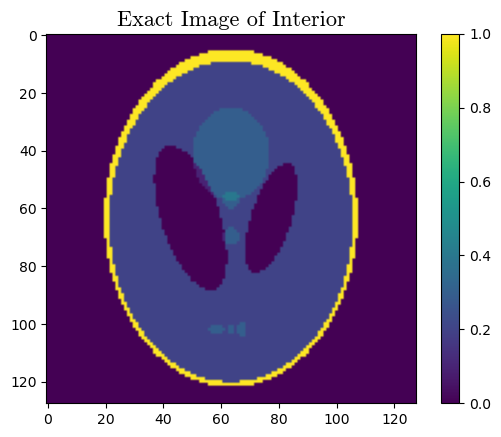

In [4]:
reader = csv.reader(open('X_128_shepplogan_rnl03.csv'), delimiter=",")
X = np.array(list(reader)).astype("float32")
plt.figure()
plt.imshow(X)
plt.title('Exact Image of Interior',fontname='cmr10',fontsize=16)
plt.colorbar()
plt.show()

(50, 128)


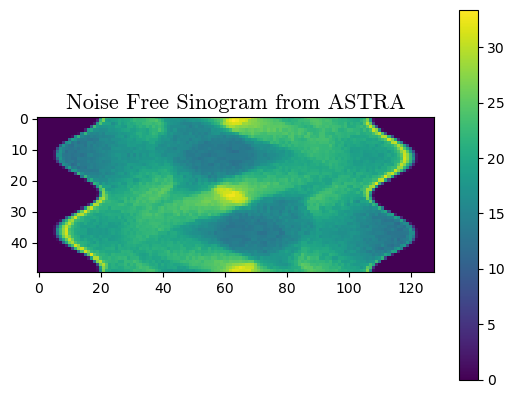

In [5]:
# CT setup
num_pixels      = np.shape(X)[0]    # Number of pixels in x/y direction (X needs to be square)
num_dets        = num_pixels        # Number of detector pixels
num_angles      = 50               # Number of projection angles
ang_start       = 0                 # Start angle in degress
ang_end         = 360               # End angle in degress
angles          = np.linspace(ang_start,ang_end,num_angles,dtype=int) / 180 * np.pi 
# %% ************************************ ASTRA ************************************
# Parameters for ASTRA
proj_model      = 'linear'          # The projection model: 'line', 'strip', or 'linear'
proj_geom       = 'fanflat'         # The projection geometry: 'parallel' or 'fanflat'
source_origin   = 1000              # Distance from source to origin/center
origin_det      = 0                 # Distance from origin/center to detector
det_width       = 1                 # Detector width
gpu             = True              # Construct unmatched normal equations: 'False' or 'True' 
CT_ASTRA = ct_astra(num_pixels,num_angles,num_dets,angles,proj_model,proj_geom,source_origin,origin_det,det_width,gpu)

# Create Sinogram
_, Bexact = astra.create_sino(X, CT_ASTRA.proj_id)
print(Bexact.shape)
plt.figure()
plt.imshow(Bexact)
plt.title('Noise Free Sinogram from ASTRA',fontname='cmr10',fontsize=16)
plt.colorbar()
plt.show()